<h1 style="letter-spacing:0px;">Striped Impulse</h1>

Esse é o nome-codigo inicial de um engine criado utilizando o Ursina.

O Ursina é uma camada de abstração em Python que executa em cima do Panda3D e simplifica bastante o trabalho.

O desenvolvimento será em Python e nao será embutido em notebooks, mas documentarei partes relevantes. No entanto, vou utilizar outros notebooks pra isso.

Neste pretendo colocar ferramentas para o engine em si.

Inicialmente, duas: o Editor SVG para desenhar cidades, e um criador de imagens para Sky Spheres.


<h1 style="letter-spacing: 0px">TODO: Edição de Imagem para Sky Sphere</h1>

Para criar imagens que possam ser mapeadas na Sky Sphere do Ursina, é preciso:

Como a intenção é desenvolver um sistema capaz de blitar nas imagens de Sky Sphere o terreno (dessa forma terrenos muito grandes, de mais do q 16Km de lado, podem ser construidos e depois de impressos na Sky Sphere destruidos e nao mais renderizados), pretendo utilizar a mesma técnica para transformar imagens comuns em Sky Spheres. 

Para isso é preciso substituir a atual Sky Sphere do Ursina pela esfera criada pela projeção de um cubo numa esfera, que estou usando para criar o planeta em que o engine atua.

A idéia é que a imagem seja dividida ao meio no sentido da esquerda para a direita e em 3 partes no sentido de baixo para cima.

as duas divisoes centrais no sentido de baixo pra cima serão então mapeadas em 2 faces verticais do cubo, e espelhada nas duas outras (isso cria uma imagem sem costuras no horizonte, mas repete os elementos, então se a imagem tiver elementos muito carateristicos no horizonte - uma pedra, uma arvore, um edificio) a repetição vai ser notada.

Ja na face superior do cubo será preciso usar um dos triangulos que compoe a face para mapear as duas partes de cima da imagem, e espelha-las no outro triangulo. Se isso causar muita distorção, pode-se fazer com qu as divisoes superiores tenham menos pixels na vertical do que as divisões centrais. Note que, se tivermos o Sol na imagem e ele nao estiver exatamente acima no meio (e ainda assim ele deve ser cortado no meio) teremos dois Sóis :) no céu.

O mesmo deve ser feito na face inferior com as divisoes inferiores com as mesmas observações sobre features muito distintas.

Feito isso projeta-se o cubo na esfera e temos uma SkySphere razoavel (espero) feita com quase qualquer imagem comum.

<h1>Simulações para o sistema de Terrenos</h1>

O sistema de terreno funciona baseado em LODs. O LOD 8 é chamado de divisão no planeta. O cubo que é projetado numa esfera tem 28 divisoes por face, o que cria 112 divisoes ao longo do que se tornará o equador da esfera.

Cada uma dessas facetas representará uma área de 354.294m, o que faz com que o planeta tenha 39K68 kms de circunferencia,o que é próximo do tamanho da Terra. Os LODs seguem a seguinte progressão:

8 - 354Km - divisao do planeta

7 - Chamado de "territorio"

177Km (177.147) - este é o unico q é uma disisao simples por 2 do superior, e isso é feito pq a distancia para
     cadeias de montanhas altas como o Everest pode ser vista a 120Km de distancia. Este nível será então plotado em arco
     acompanhando a curvatura do planeta, e plotado na SkySphere, depois nao será mais plotado a nao ser que o player
     se desloque o suficiente (muitos Kms de distancia, provavelmente 19K)
     
6 - Chamado de "Ambito"

19.683m - a partir deste nivel os niveis abaixo sao divisoes por 9 dos acima. Este nivel é o que vai de um horizonte a outro         (de fato é um pouco maior, 16Km seria suficiente). Este também pode ser blitado na SkySphere mas deve ser recriado com         mais frequencia (por ex qdo o player se mover 2Km)

5 - Chamado de "Localidade"

2187m - O engine tem o conceito de "localidades" que não são equivalentes a este conceito: aqui trata-se somente do nome dado a divisoes por 9 do ambito.

4 - Local distante (local far) - 243m

3 - Local - 27m

2 - Local proximo (local near) - 9m - a partir daqui os LODs sao divioes por 3 e nao por 9 dos acima

1 - Agente - 3m

O planeta é gerado com ruido Perlin, continuo numa projeção esférica na qual se usam como valores as posicoes X,Y e Z dos vertices do cubo, ja projetados na esfera. Isso garante continuidade (o planeta nao tem costuras) mas com ausencia de repeticoes (cada feature no planeta é unica).

Os LODs devem ser recriados somente quando necessarios. Os de nivel 1, 2 e 3 são modificados constamente quando o player se move. Os demais são invalidados e recriados somente quando o player se aproxima.

A ideia dos LODs é então nao modificar radicalmente as features do terreno. Para isso, o nivel 7 nao deve modificar nem a posicao dos 4 pontos vertices no nivel 8 que o define, nem fazer com que a altura média no nivel 8 seja radicalmente modificada.

Atualmente a tecnica utilizada é gerar ruido Perlin numa matriz de 27 x 27 e interpretar o valor como uma variacao de altura menor do q na do LOD anterior, a saber:

8 - variação é normalizada para o intervalo de -0.86 a 0.86, e multiplicada por 10.000 representa metros de altitude ou profundidade.

7 - Este nivel é gerado com a mesma tecnica do acima, mas os valores sao escalados para cima ou para baixo para manter a
     altura media obtida nos 4 pontos de origem.

6 - norm, para cada nivel considera-se a variação como um terço do tamanho do LOD abaixo, ou seja, +/- 729m

5 - => 81m

4 => += 9m

3 => += 3m

2 => += 1m

1 => norm, considera-se a variação +/- um 27 avos do tamanho do nivel, ou seja, +/- 11cm

Abaixo encontram-se simulações do procedimento, utilizadas para ajuste do algoritmo.

In [ ]:
!pip install perlin-noise
!pip install matplotlib

planet height 0.0
planet height 291.45456046796926
planet height -225.67519159330365
planet height -733.4633050203402


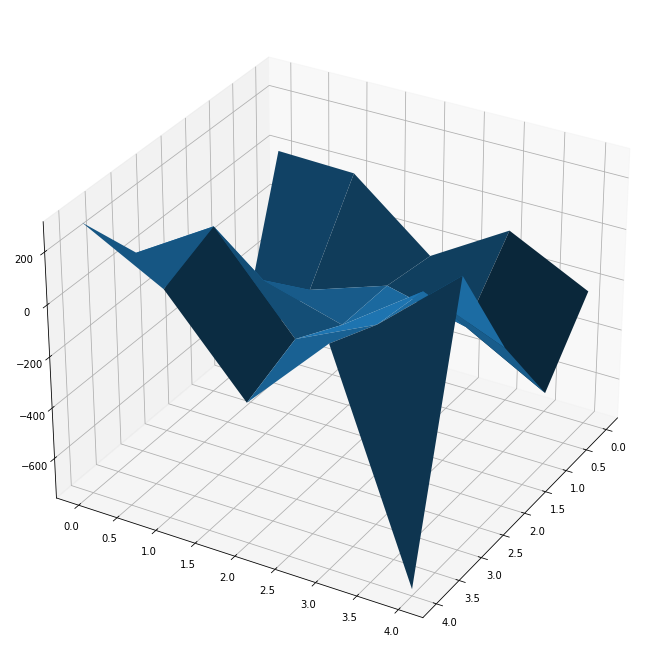

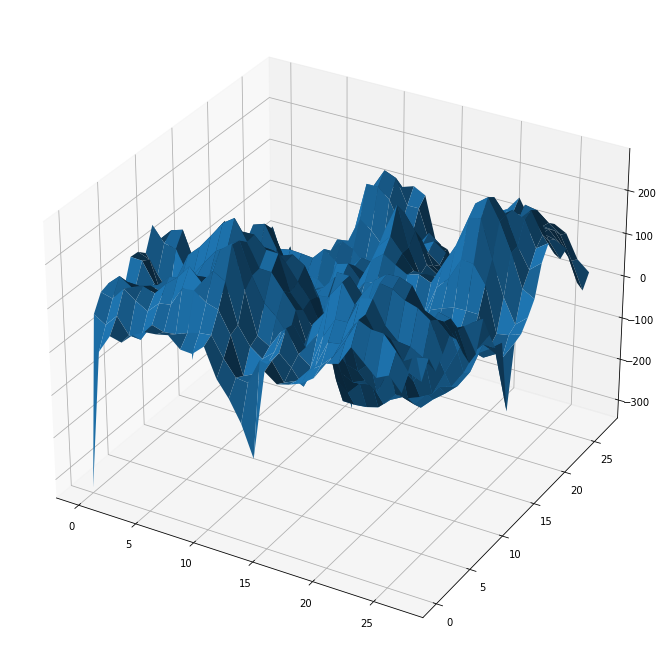

[-331.36814864931813,
 -1.7406222566855456,
 42.22088500444128,
 35.559078594571716,
 60.97205974107382,
 75.66383297041038,
 78.48254576925014,
 84.7244021397033,
 60.15318246848006,
 58.20942379645719,
 83.08280870781583,
 17.728706789514145,
 -19.192549663793677,
 -68.33262805058808,
 -140.75284254663046,
 67.23160897175818,
 46.858029113784376,
 54.40969520973728,
 65.30931529022382,
 85.40399927901521,
 125.83341810550318,
 133.70330032661812,
 178.88629429027415,
 152.99092831567455,
 127.37669084666946,
 141.02930944307042,
 110.10854312489106,
 215.86822039652543,
 63.07547379980979,
 46.47149534227188,
 74.96193748204976,
 38.312696864113,
 36.22115656652304,
 78.16064781622164,
 69.86976982995532,
 73.26185985390781,
 83.8812148062785,
 91.85748705196853,
 95.31520726832368,
 50.11792200449565,
 14.477500332804308,
 11.151419882637693,
 70.11979325612515,
 77.4712160886046,
 36.24063003078212,
 48.81079898314878,
 80.33875626435012,
 99.46150060374465,
 127.62981432890757,
 1

In [6]:
from perlin_noise import PerlinNoise
from math import sqrt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np

%matplotlib inline


class StripedTerrain():
    def __init__( self ):
        _divs = 28
        
        # heightmap keeps level 8 - there is no other representation of level 8 in the engine
        self.heightmap = [ -1 for i in range(( _divs + 1 )**2 * 6 )]

        # noise convolution
        _conv = 4

        # TODO: allow change planet seed
        self.__noise = [ PerlinNoise( octaves = 2 * 2 ** i, seed = 1 ) for i in range( _conv )]
        
        self.__levels = None

        
    def __conv( self ):
        return 4

    
    def divs( self ):
        return 28
    
        
    def __latLong2idx( self, lat, long, face ):
        lat = int( lat ) % 28
        long = int( long ) % 28

        return face * ( self.divs() + 1 )**2 + lat * ( self.divs() + 1 ) + long
    
    
    def noise_power( self ):
        return 1.5
    

    def __vx_face( self, lat, long, face ):
        vx = ( -1., -1., -1. )
        divs = float( self.divs())

        f_ = face
        if f_ == 0:
            vx = ( long / divs,  ( 1. - lat / divs ), 0. )

        if f_ == 1:
            vx = ( long / divs,  0., lat / divs )

        if f_ == 2:
            vx = ( long / divs,  lat / divs, 1.0 )

        if f_ == 3:
            vx = ( long / divs, 1.0, ( 1. - lat / divs ))

        if f_ == 4:
            vx = ( 0., ( 1. - lat / divs ), ( 1. - long / divs ))

        if f_ == 5:
            vx = ( 1., ( 1. - lat / divs ), long / divs )

        len_ = sqrt( vx[ 0 ]**2 + vx[ 1 ]** + vx[ 2 ]**2 )
        vx = tuple([ v / len_ for v in list( vx )])

        return vx
    
    
    def __planet_height( self, lat, long, face ):
        vx = self.__vx_face( lat, long, face )

        h = sum([ self.__noise[ i ]( vx ) / float( i + 1 )**self.noise_power() for i in range( self.__conv())])
        h = h * 10000.
        h = h / 72. * 86.
        
        print( "planet height", h )
        return h

    
    def get_level0( self ):

        # fidx é o indice da face do cubo em que estamos, o sistema de posicionamento no planeta do engine nao é 
        # lat,long somente, mas lat/long q variam de 0 a 28 em cada face, entao lat/long ahead, behind, east, west, north and south
        #fidx = self.face_index( self.__face )
        fidx = 0
        
        # heightmap keeps level 8 - there is no other representation of level 8 in the engine
        for long_ in range( 2 ):
            for lat_ in range( 2 ):
                val = self.__planet_height( lat_, long_, fidx )
                self.heightmap[ self.__latLong2idx( lat_, long_, fidx )] = val

        xsinc = [ 0., 0., 2., 0., 1., 3. ]
        ysinc = [ 0., 1., 2., 3., 0., 0. ]

        self.__levels = [[]]

        # cada quadrado no nivel 8 é dividido em uma grid de 4x4 para posicionar o nivel 7 em ate nove posições diferentes
        for y in range( 5 ):
            for x in range( 5 ):
                vx = ( float( x ) / 5. + 28. * xsinc[ fidx ], float( y ) / 5 + 28. * ysinc[ fidx ])
                val = sum([( self.__noise[ i ]( vx ) / float( i + 1 )**self.noise_power()) / 5. 
                               for i in range( self.__conv())])
                # 10000 changes perlin noise to altitude in meters
                self.__levels[ 0 ].append( val * 10000. )

        self.__levels[ 0 ][  0 ], self.__levels[ 0 ][  4 ] = 0., 0. 
        self.__levels[ 0 ][ 20 ], self.__levels[ 0 ][ 24 ] = 0., 0.

        max7 = max( self.__levels[ 0 ])
        min7 = min( self.__levels[ 0 ])
        med7 = ( max7 + min7 ) / 2.
        diff7 = max7 - min7

        pdata = []
        for long_ in range( 2 ):
            for lat_ in range( 2 ):
                pdata.append( self.heightmap[ self.__latLong2idx( lat_, long_, fidx )])

        max8 = max( pdata )
        min8 = min( pdata )
        med8 = ( max8 + min8 ) / 2.
        diff8 = max8 - min8
        
        self.__levels[ 0 ][ 0 ], self.__levels[ 0 ][ 4 ] = pdata[ 0 ], pdata[ 1 ] 
        self.__levels[ 0 ][ 20 ], self.__levels[ 0 ][ 24 ] = pdata[ 2 ], pdata[ 3 ]

        step = 10. 
        mult = 0.00125
        lim = abs( diff8 - diff7 ) / 100.
        
        while abs( diff8 - diff7 ) > lim or abs( med8 - med7 ) > lim:
            self.__levels[ 0 ][  0 ], self.__levels[ 0 ][  4 ] = 0., 0. 
            self.__levels[ 0 ][ 20 ], self.__levels[ 0 ][ 24 ] = 0., 0.
            
            if abs( med8 - med7 ) > lim:
                self.__levels[ 0 ] = [ v + step * ( 1 if med7 < med8 else -1 ) for v in self.__levels[ 0 ]]

            if abs( diff8 - diff7 ) > lim:
                self.__levels[ 0 ] = [ v * ( 1. + mult * ( 1 if diff7 < diff8 else -1 )) for v in self.__levels[ 0 ]]

            self.__levels[ 0 ][ 0 ], self.__levels[ 0 ][ 4 ] = pdata[ 0 ], pdata[ 1 ] 
            self.__levels[ 0 ][ 20 ], self.__levels[ 0 ][ 24 ] = pdata[ 2 ], pdata[ 3 ]
            
            max7 = max( self.__levels[ 0 ])
            min7 = min( self.__levels[ 0 ])
            med7 = ( max7 + min7 ) / 2.
            diff7 = max7 - min7

        x2 = np.arange( 2 )
        y2 = np.arange( 2 )

        x5 = np.arange( 5 )
        y5 = np.arange( 5 )

        #X,Y = np.meshgrid( x2, y2 )
        X,Y = np.meshgrid( x5, y5 )
        
        Z = np.array( pdata )
        Z = np.reshape( Z, ( 2, 2 ))

        Z1 = np.array( self.__levels[ 0 ])
        Z1 = np.reshape( Z1, ( 5, 5 ))
        #Z1 = Z[ 1:4, 1:4 ]

        Z = Z1
        
        fig = plt.figure( figsize=( 12, 12 ))
        ax = fig.add_subplot(111, projection='3d')

        # Plot a 3D surface
        ax.view_init( 30, 30 )
        #ax.contour3D( X, Y, Z, 100, cmap="binary" )
        ax.plot_surface( X, Y, Z )
        plt.show()



    def get_level( self, level ):
        self.get_level0()
        
        # calculate planet div data
        territory_pos = ( 1, 1 )
        ambit_pos = ( 4, 4 )
        location_pos = ( 4,4 )
        idxs = [ -1, territory_pos, ambit_pos, location_pos ]

        avg7 = sum( self.__levels[ 0 ]) / float( len( self.__levels[ 0 ]))
        
        Z = np.array( self.__levels[ 0 ])
        Z = np.reshape( Z, ( 5, 5 ))
        Z = Z[ territory_pos[ 1 ]:territory_pos[ 1 ] + 3, territory_pos[ 0 ]:territory_pos[ 0 ] + 3 ]
        Z = np.reshape( Z, ( 9 ))

        max8 = max( Z )
        min8 = min( Z )
        med8 = ( max8 + min8 ) / 2.
        diff8 = max8 - min8

        if len( self.__levels ) == 1:
            self.__levels.append([])
            for y in range( 28 ):
                for x in range( 28 ):
                    vx = ( float( x ) / 28. + idxs[ 1 ][ 0 ], float( y ) / 28. + idxs[ 1 ][ 1 ] )
                    val = sum([( self.__noise[ i ]( vx ) / float( i + 1 )**self.noise_power())  
                                                for i in range( self.__conv())])
                    self.__levels[ 1 ].append( val * 10000. )

            idx = idxs[ 1 ][ 1 ] * 5 + idxs[ 1 ][ 0 ]
            l0 = self.__levels[ 0 ]
            pdata = list( Z )

            l1 = self.__levels[ 1 ] 
            l1[ 0 ], l1[ 14 ], l1[ 27 ] = pdata[ 0 ], pdata[ 1 ], pdata[ 2 ] 
            mid = 14 * 28 
            l1[ mid ], l1[ mid + 14 ], l1[ mid + 27 ] = pdata[ 3 ], pdata[ 4 ], pdata[ 5 ] 
            end = 27 * 28
            l1[ end ], l1[ end + 14 ], l1[ end + 27 ] = pdata[ 6 ], pdata[ 7 ], pdata[ 8 ]

            max7 = max( l1 )
            min7 = min( l1 )
            med7 = ( max7 + min7 ) / 2.
            diff7 = max7 - min7
            
            step = 10. 
            mult = 0.00125
            lim = abs( diff8 - diff7 ) / 100.

            while abs( diff8 - diff7 ) > lim or abs( med8 - med7 ) > lim:
                l1[ 0 ], l1[ 14 ], l1[ 27 ] = 0., 0., 0.
                mid = 14 * 28 
                l1[ mid ], l1[ mid + 14 ], l1[ mid + 27 ] = 0., 0., 0. 
                end = 27 * 28
                l1[ end ], l1[ end + 14 ], l1[ end + 27 ] = 0., 0., 0.

                if abs( med8 - med7 ) > lim:
                    self.__levels[ 1 ] = [ v + step * ( 1 if med7 < med8 else -1 ) for v in self.__levels[ 1 ]]

                if abs( diff8 - diff7 ) > lim:
                    self.__levels[ 1 ] = [ v * ( 1. + mult * ( 1 if diff7 < diff8 else -1 )) for v in self.__levels[ 1 ]]

                l1 = self.__levels[ 1 ]
                l1[ 0 ], l1[ 14 ], l1[ 27 ] = pdata[ 0 ], pdata[ 1 ], pdata[ 2 ] 
                mid = 14 * 28 
                l1[ mid ], l1[ mid + 14 ], l1[ mid + 27 ] = pdata[ 3 ], pdata[ 4 ], pdata[ 5 ] 
                end = 27 * 28
                l1[ end ], l1[ end + 14 ], l1[ end + 27 ] = pdata[ 6 ], pdata[ 7 ], pdata[ 8 ]

                max7 = max( l1 )
                min7 = min( l1 )
                med7 = ( max7 + min7 ) / 2.
                diff7 = max7 - min7
            
        if level <= 1:
            x = np.arange( 28 )
            y = np.arange( 28 )
            X,Y = np.meshgrid( x, y )
            
            x3 = np.arange( 3 )
            y3 = np.arange( 3 )
            #X,Y = np.meshgrid( x3, y3 )

            Z = np.array( self.__levels[ 1 ])
            Z = np.reshape( Z, ( 28, 28 ))

            Z1 = np.array( self.__levels[ 0 ])
            Z1 = np.reshape( Z1, ( 5, 5 ))
            Z1 = Z1[ territory_pos[ 1 ]:territory_pos[ 1 ] + 3, territory_pos[ 0 ]:territory_pos[ 0 ] + 3 ]

            #Z = Z1

            fig = plt.figure( figsize = ( 12, 12 ))
            ax = fig.add_subplot( 111, projection='3d' )

            # Plot a 3D surface
            ax.plot_surface( X, Y, Z )
            #ax.contour3D( X, Y, Z, 100, cmap="binary" )

            plt.show()
            
            return self.__levels[ 1 ]

        
teste = StripedTerrain()
teste.get_level( 1 )


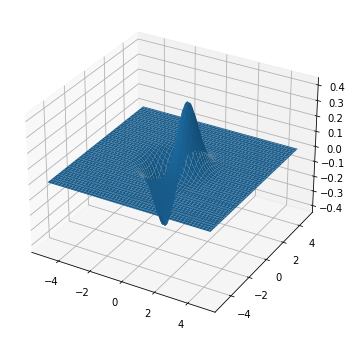

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
#if using a Jupyter notebook, include:
%matplotlib inline

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X*np.exp(-X**2 - Y**2)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
ax.plot_surface(X, Y, Z)


plt.show()

<h1 style="letter-spacing:0px;">Editor de salas</h1>

Utilizei um projeto chamado PSVG (se tiver interesse está no GitHub) para criar um SVG programavel para gerar o SVG que vai ser usado como base pelo engine para desenhar salas.

O projeto é bem pequeno e em javascript, e de fato todo o codigo fonte dele (q parece ter sido abandonado) se encontra na celula abaixo.

<b>O codigo abaixo nao funciona diretamente dentro de um notebook Jupyter, mas vc pode copiar e colar o codigo, salva-lo como html e abrir localmente que você terá o editor funcional.</b>

Javascript não pode salvar diretamente, então o botão SAVE provocará um download de 2 arquivos na pasta de dowloads local.

In [1]:
import IPython

display( IPython.core.display.HTML( '''
<html>
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/codemirror/5.58.1/codemirror.min.css">
<link rel="stylesheet" href="https://codemirror.net/theme/xq-light.css">
<script src="https://cdnjs.cloudflare.com/ajax/libs/codemirror/5.58.1/codemirror.min.js"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/codemirror/5.58.1/addon/edit/matchbrackets.min.js"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/codemirror/5.58.1/addon/comment/comment.min.js"></script>
<script src="https://codemirror.net/mode/xml/xml.js"></script>
<script>
mapeditor = `

  <style>
    :root
    {
    	--floor: black;
    	--floor-w: 5px;
    	--wall: yellow;
   }
  </style>

  <def-room_rect px="" py="" w="" h="" name="" doors_on_walls="-1" doors_pos="-1">
    <g>
      <title id="{name}"/>
      <var posx="[ ]" dirx="[ ]" />
      <g style="{posx.splice(0,2), posx.push([ 0, 0 ], [ 0, 1 ], [ 1,  1 ], [  1, 0 ])}"></g>
      <g style="{dirx.splice(0,2), dirx.push([ 0, 1 ], [ 1, 0 ], [ 0, -1 ], [ -1, 0 ])}"></g>

      <var floors="[ ]" walls="[ ]" door="0" cont="0" pos="[ ]" dir="[ ]" />
      <g style="{ doors_on_walls = Array.isArray(doors_on_walls) ? doors_on_walls : [ doors_on_walls ]}"></g>
      <g style="{ doors_pos = Array.isArray(doors_pos) ? doors_pos : [ doors_pos ]}"></g>
      <g style="{ floors.splice(0,2), walls.splice(0,2), pos.splice(0,2), dir.splice(0,2), doors_on_walls.push( -1 )}"></g>

      <for i="0" true="{ i < 4 }">
          <g style="{ pos = posx[ i ], dir = dirx[ i ]}"></g>

          <g style="{ floors.push( 'M', ( px + pos[ 0 ] * w ) * scale, ( py + pos[ 1 ] * h ) * scale )}"></g>
          <g style="{  walls.push( 'M', ( px + pos[ 0 ] * w ) * scale, ( py + pos[ 1 ] * h ) * scale )}"></g>

          <if true="{ i == doors_on_walls[ cont ]}">
              <g style="{ door = doors_pos[ cont ], cont++ }"></g>

              <g style="{ walls.push( 'L', ( px + pos[ 0 ] * w + dir[ 0 ] * door ) * scale, ( py + pos[ 1 ] * h + dir[ 1 ] * door ) * scale )}"></g>
              <g style="{ door+=1, walls.push( 'M' )}"></g>
              <g style="{ walls.push(( px + pos[ 0 ] * w + dir[ 0 ] * door ) * scale, ( py + pos[ 1 ] * h + dir[ 1 ] * door ) * scale )}"></g>
          </if>
          <g style="{floors.push( 'L', ( px + pos[ 0 ] * w + dir[ 0 ] * w ) * scale, ( py + pos[ 1 ] * h + dir[ 1 ] * h ) * scale )}"></g>
          <g style="{ walls.push( 'L', ( px + pos[ 0 ] * w + dir[ 0 ] * w ) * scale, ( py + pos[ 1 ] * h + dir[ 1 ] * h ) * scale )}"></g>
      </for>
      <path d="{floors}" stroke-width="var(--floor-w)" stroke="var(--floor)" fill="none" />
      <path d="{walls}" stroke-width="1px" stroke="var(--wall)" fill="none" />
    </g>
  </def-room_rect>

  <def-room_shape px="" py="" gridw="" gridh="" name="" floor_tuples="-1" doors="-1">
    <g>
      <title id="{name}"/>
      <g style="{ floor_tuples = Array.isArray( floor_tuples ) ? floor_tuples : [ floor_tuples ]}"></g>
      <g style="{ doors = Array.isArray( doors ) ? doors : [ doors ], floor_tuples.push( -1, -1, -1, -1 ), doors.push( -1 )}"></g>

      <var floors="[ ]" walls="[ ]" ft="" />
      <g style="{ floors.splice( 0, 2 ), walls.splice( 0, 2 ), ft = floor_tuples }"></g>

      <for i="0" true="{ ft.length > 0 }" step="2">
        <if false="{ ft[ 0 ] == -1 || ft[ 2 ] == -1 }">
          <g style="{ floors.push( 'M', ( px + ft[ 0 ]) * scale, ( py + ft[ 1 ]) * scale )}"></g>
          <g style="{ floors.push( 'L', ( px + ft[ 2 ]) * scale, ( py + ft[ 3 ]) * scale )}"></g>

          <if false="{ i == doors[ 0 ]}">
            <g style="{ walls.push( 'M', ( px + ft[ 0 ]) * scale, ( py + ft[ 1 ]) * scale )}"></g>
            <g style="{ walls.push( 'L', ( px + ft[ 2 ]) * scale, ( py + ft[ 3 ]) * scale ), doors.shift()}"></g>
          </if>
        </if>
        <g style="{ ft.splice( 0, 2 )}"></g>
      </for>
      <path d="{floors}" stroke-width="var(--floor-w)" stroke="var(--floor)" fill="none" />
      <path d="{walls}" stroke-width="1px" stroke="var(--wall)" fill="none" />
    </g>
  </def-room_shape>-->
  <g transform="translate( 0 640)"><g transform="scale(1,-1)">
  `;
</script>
<style>
  /* modify xq-light theme so strings don't look crazy red */
  .cm-s-xq-light span.cm-string { 
    color: rgb(200,50,10); 
  }

  body{
    margin:4px;
    margin-left:10px;
    overflow:hidden;
    width: 100%;
    height: 100%;
    border: 1px solid black;
  }
  h1{
    margin:0px;
    font-size:20px;
    font-weight: lighter;
   font-family: sans-serif;
  }
  #input {
    position:absolute;
    left:0px;
    top:100px;
    width:50%;
    height:calc(100% - 100px);
    border-right: 1px solid #bbb;
  }
  #output {
    position:absolute;
    left:50%;
    top:100px;
    width:50%;
    height:calc(100% - 100px);
    border: 3px solid black;
  }
  #github {
    opacity:30%;
    position:absolute;
    right:9px;
    top:8px;
    cursor:pointer;
    z-index:1000;
  }
  #github:hover {
    opacity:50%;
  }
  #compile {
    position:absolute;
    left:calc(50% - 100px);
    top:4px;
    height:40px;
    width:200px;
  }
  #select {
    position:absolute;
    right:calc(50% + 10px);
    top:55px;
    z-index:999;
  }
  #auto-compile {
    position:absolute;
    left:calc(50% + 110px);
    top: 14px;
    height: 16px;
    width: 16px;
  }
  #auto-compile-label {
    position: absolute;
    left: calc(50% + 135px);
    top: 16px;
    line-height: 20px;
    font-family: sans-serif;
  }
  .CodeMirror {
    height: 100%;
  }
</style>
<body>
    <div style="display: block; width: 100%; height: 1024px">
  <h1>PSVG</h1>
  <i style="font-size:13px;font-weight:lighter;">Programmable SVG format</i>
  <textarea id="input">
  &lt;psvg width="640" height="640" style="border: 1px solid black"&gt;
  &lt;var scale="40"/&gt;
  &lt;room_rect px="1" py="2" w="2" h="2" doors_on_walls="0 2" doors_pos="1 1" name="sala 1" /&gt;
  &lt;room_rect px="3" py="2" w="3" h="1" doors_on_walls="0 2" doors_pos="0 0"
        name="corredor 1" /&gt;
  &lt;room_shape px="6" py="1" gridw="3" gridh="3" name="sala 2" 
        floor_tuples="0 1 0 2 0.85 3 2.15 3 3 2.15 3 0.85 2.15 0 0.85 0 0 1" doors="0" /&gt;
&lt;/psvg&gt;  


  </textarea>
  <div id="output"></div>
  <!--<select id="select">
    <option value="helloworld.psvg">helloworld.psvg</option><option value="hilbert.psvg">hilbert.psvg</option><option value="koch.psvg">koch.psvg</option><option value="poisson.psvg">poisson.psvg</option><option value="pulsar.psvg">pulsar.psvg</option><option value="pythagoras.psvg">pythagoras.psvg</option><option value="schotter.psvg">schotter.psvg</option><option value="shapemorph.psvg">shapemorph.psvg</option><option value="sierpinski.psvg">sierpinski.psvg</option><option value="sphere.psvg">sphere.psvg</option><option value="terrain.psvg">terrain.psvg</option><option value="textanim.psvg">textanim.psvg</option><option value="tree.psvg">tree.psvg</option><option value="turing.psvg">turing.psvg</option>
  </select>-->
  
  <button id="compile">COMPILE</button>
  <button id="saveSVG">SAVE</button>
  <button id="viewSVG">VIEW SVG</button>


  <input id="auto-compile" name="auto-compile" type="checkbox"></input>
  <label id="auto-compile-label" for="auto-compile">Auto</label>
  
  <a id="github" href="https://github.com/LingDong-/psvg" target="_blank">
    <svg fill="black" version="1.1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0" y="0" width="32" height="32" viewBox="0, 0, 32, 32">
      <path d="M15.999,-0 C7.163,-0 0,7.345 0,16.405 C0,23.653 4.584,29.802 10.942,31.972 C11.743,32.122 12.034,31.615 12.034,31.18 C12.034,30.792 12.021,29.759 12.013,28.391 C7.562,29.382 6.623,26.191 6.623,26.191 C5.895,24.296 4.846,23.791 4.846,23.791 C3.394,22.774 4.956,22.794 4.956,22.794 C6.562,22.91 7.407,24.485 7.407,24.485 C8.834,26.992 11.152,26.268 12.064,25.848 C12.209,24.788 12.622,24.065 13.079,23.655 C9.527,23.242 5.791,21.834 5.791,15.547 C5.791,13.757 6.415,12.292 7.438,11.145 C7.273,10.73 6.724,9.063 7.595,6.804 C7.595,6.804 8.938,6.363 11.995,8.486 C13.271,8.121 14.64,7.94 16,7.934 C17.359,7.94 18.728,8.121 20.006,8.486 C23.061,6.363 24.401,6.804 24.401,6.804 C25.275,9.063 24.726,10.73 24.561,11.145 C25.586,12.292 26.206,13.757 26.206,15.547 C26.206,21.85 22.465,23.236 18.9,23.642 C19.475,24.149 19.986,25.15 19.986,26.681 C19.986,28.873 19.967,30.643 19.967,31.18 C19.967,31.619 20.255,32.13 21.067,31.97 C27.42,29.796 32,23.651 32,16.405 C32,7.345 24.836,-0 15.999,-0"/>
    </svg>
  </a>

  <hr style="position: absolute;left:0px;top:40px;width:100%"/>
  </div>
</body>
<script>
  var PSVG = (() => {
  var __defineProperty = Object.defineProperty;
  var __commonJS = (callback, module) => () => {
    if (!module) {
      module = {exports: {}};
      callback(module.exports, module);
    }
    return module.exports;
  };
  var __markAsModule = (target) => {
    return __defineProperty(target, "__esModule", {value: true});
  };
  var __export = (target, all) => {
    __markAsModule(target);
    for (var name in all)
      __defineProperty(target, name, {get: all[name], enumerable: true});
  };

  // src/psvg.ts
  var require_psvg = __commonJS((exports) => {
    __export(exports, {
      compilePSVG: () => compilePSVG,
      evalPSVG: () => evalPSVG,
      parsePSVG: () => parsePSVG,
      transpilePSVG: () => transpilePSVG
    });
    if (typeof window !== "undefined") {
      window.addEventListener("load", function() {
        const psvgs = document.getElementsByTagName("PSVG");
        for (let i = 0; i < psvgs.length; i++) {
          psvgs[i].outerHTML = compilePSVG(psvgs[i].outerHTML);
        }
      });
    }
  });

  // src/parser.ts


  function parsePSVG( str ) 
  {
    str = str.replace(/<!--[^\0]*?-->/gm, "");
    let i = 0;
    const elts = [];
    while (i <= str.length) {
      if (str[i] == "<") {
        let j = i + 1;
        let bodyStart = -1;
        let bodyEnd = -1;
        let quote = false;
        let lvl = 0;
        const getTagName = (open) => open.trim().split(" ")[0].trimEnd();
        const getAttributes = (open) => {
          const attrsStr = open.split(" ").slice(1).join(" ");
          const matchAll = attrsStr.matchAll ? (re) => attrsStr.matchAll(re) : (re) => {
            const ms = [];
            while (1) {
              const m = re.exec(attrsStr);
              if (m)
                ms.push(m);
              else
                break;
            }
            return ms;
          };
          const fromEntries = Object.fromEntries || ((a) => {
            const o = {};
            a.map(([key, value]) => o[key] = value);
            return o;
          });
          return fromEntries(Array["from"](matchAll(/(^| )([^ ]+?)\ *= *"([^"]*)"/g)).map((x) => x.slice(2)));
        };
        const parseNormalTag = () => {
          const open = str.slice(i + 1, bodyStart - 1);
          const body = str.slice(bodyStart, bodyEnd);
          const elt = {
            tagName: getTagName(open),
            attributes: getAttributes(open),
            children: parsePSVG(body),
            innerHTML: body
          };
          elts.push(elt);
        };
        const parseSelfClosingTag = () => {
          const open = str.slice(i + 1, j);
          const elt = {
            tagName: getTagName(open),
            attributes: getAttributes(open),
            children: [],
            innerHTML: ""
          };
          elts.push(elt);
        };
        while (j <= str.length) {
          if (str[j] == "\\") {
            j++;
          }
          if (str[j] == '"') {
            quote = !quote;
          }
          if (!quote) {
            if (str[j] == ">" && lvl == 0 && bodyStart == -1) {
              bodyStart = j + 1;
            }
            if (str[j] == "<") {
              if (str[j + 1] == "/") {
                lvl--;
                if (lvl == -1) {
                  bodyEnd = j;
                }
                while (str[j] != ">") {
                  j++;
                }
                if (lvl == -1) {
                  parseNormalTag();
                  i = j;
                  break;
                }
              } else {
                lvl++;
              }
            } else if (str[j] == "/" && str[j + 1] == ">") {
              lvl--;
              if (lvl == -1) {
                parseSelfClosingTag();
                i = j;
                break;
              }
            }
          }
          j++;
        }
      }
      i++;
    }
    return elts;
  }

  // src/transpiler.ts
  function transpilePSVG(prgm) {
    let funcs = {};
    function __val(x) {
      if (new RegExp(/^[+-]?(\d+([.]\d*)?([eE][+-]?\d+)?|[.]\d+([eE][+-]?\d+)?)$/g).test(x)) {
        return parseFloat(x);
      }
      if (x == `true` || x == `false`) {
        return x == `true`;
      }
      let hascm = x["includes"](",");
      if (hascm) {
        x = x.replace(/, */g, ",");
        let hasws = x["includes"](" ");
        var y = __tolist(x);
        if (!hasws) {
          y["allCommas"] = true;
        }
        return y;
      }
      if (x["includes"](" ")) {
        return __tolist(x);
      }
      return x;
    }
    function __makelist(x) {
      x.toString = function() {
        return x.join(x["allCommas"] ? "," : " ");
      };
      return x;
    }
    function __tolist(s) {
      return __makelist(s.replace(/,/g, " ").split(" ").filter((x) => x.length).map(__val));
    }
    let builtins = {
      NTH: function(x, i) {
        if (typeof x == "string") {
          x = __tolist(x);
        }
        return x[i];
      }.toString(),
      TAKE: function(x, n) {
        if (typeof x == "string") {
          x = __tolist(x);
        }
        return __makelist(x.slice(0, n));
      }.toString(),
      DROP: function(x, n) {
        if (typeof x == "string") {
          x = __tolist(x);
        }
        return __makelist(x.slice(n));
      }.toString(),
      UPDATE: function(x, i, y) {
        if (typeof x == "string") {
          x = __tolist(x);
        }
        let z = x.slice();
        z[i] = y;
        return __makelist(z);
      }.toString(),
      MAP: function(x, f) {
        if (typeof x == "string") {
          x = __tolist(x);
        }
        return __makelist(x.map((y) => f(__val(y))));
      }.toString(),
      FILTER: function(x, f) {
        if (typeof x == "string") {
          x = __tolist(x);
        }
        return __makelist(x.filter((y) => f(__val(y))));
      }.toString(),
      COUNT: function(x) {
        if (typeof x == "string") {
          x = __tolist(x);
        }
        return x.length;
      }.toString(),
      CAT: function(...args) {
        return __makelist([].concat(...args.filter((y) => y.toString().length).map((x) => typeof x == "string" ? __tolist(x) : x)));
      }.toString(),
      REV: function(x) {
        if (typeof x == "string") {
          x = __tolist(x);
        }
        return __makelist(x.slice().reverse());
      }.toString(),
      FILL: function(x, n) {
        return __makelist(new Array(n)["fill"](x));
      }.toString(),
      LERP: function(x, y, t) {
        return x * (1 - t) + y * t;
      }.toString(),
      CLAMP: function(x, lo, hi) {
        [lo, hi] = [Math.min(lo, hi), Math.max(lo, hi)];
        return Math.min(Math.max(x, lo), hi);
      }.toString(),
      MAPVAL: function(x, istart, istop, ostart, ostop) {
        return ostart + (ostop - ostart) * ((x - istart) / (istop - istart));
      }.toString()
    };
    Object.getOwnPropertyNames(Math).map((x) => builtins[x.toUpperCase()] = `Math["${x}"]`);
    return __val.toString() + ";" + __tolist.toString() + ";" + __makelist.toString() + ";" + Object["entries"](builtins).map((x) => "const " + x[0] + "=" + x[1]).join(";") + ";let __out='';" + transpilePSVGList(prgm) + ";__out;";
    function transpilePSVGList(prgm2) {
      var _a, _b, _c;
      let out = "";
      let groups = 0;
      function transpileValue(x) {
        x = x.trim();
        x = x.replace(/&gt;/g, ">").replace(/&lt;/g, "<").replace(/&amp;/g, "&").replace(/&quot;/g, '"');
        if (x["startsWith"]("{") && x["endsWith"]("}") && (x.match(/{|}/g) || []).length == 2) {
          return x.slice(1, -1);
        }
        if (new RegExp(/^[+-]?(\d+([.]\d*)?([eE][+-]?\d+)?|[.]\d+([eE][+-]?\d+)?)$/g).test(x)) {
          return x;
        }
        return "__val(`" + x.replace(/([^\\]|^)\{/g, "$1${") + "`)";
      }
      for (var i = 0; i < prgm2.length; i++) {
        if (prgm2[i].tagName.toUpperCase() == "PSVG") {
          let w = transpileValue((_a = prgm2[i].attributes.width) != null ? _a : "100");
          let h = transpileValue((_b = prgm2[i].attributes.height) != null ? _b : "100");
          out += `__out+=\`<svg xmlns="http://www.w3.org/2000/svg" width="\${${w}}" height="\${${h}}" `;
          for (var k in prgm2[i].attributes) {
            if (!["width", "height", "background"]["includes"](k)) {
              out += `${k}="\${${transpileValue(prgm2[i].attributes[k])}}" `;
            }
          }
          out += ">`;";
          out += `const WIDTH=${w};const HEIGHT=${h};`;
          if (prgm2[i].attributes.background) {
            out += `__out+=\`<rect x="0" y="0" width="\${${w}}" height="\${${h}}" fill="\${${transpileValue(prgm2[i].attributes.background)}}"/>\`;`;
          }
          out += transpilePSVGList(prgm2[i].children);
          out += `__out+='</svg>';`;
        } else if (prgm2[i].tagName.toUpperCase()["startsWith"]("DEF-")) {
          let name = prgm2[i].tagName.split("-").slice(1).join("-");
          funcs[name] = {name, args: Object.keys(prgm2[i].attributes)};
          out += `function ${name}(${Object["entries"](prgm2[i].attributes).map((x) => x[0] + "=" + transpileValue(x[1]))}){`;
          out += transpilePSVGList(prgm2[i].children);
          out += `};`;
        } else if (prgm2[i].tagName.toUpperCase() == "IF") {
          if (Object.keys(prgm2[i].attributes).length == 0) {
            for (var j = 0; j < prgm2[i].children.length; j++) {
              if (j != 0) {
                out += "else ";
              }
              if (prgm2[i].children[j].attributes.true) {
                out += `if (${transpileValue(prgm2[i].children[j].attributes.true)})`;
              } else if (prgm2[i].children[j].attributes.false) {
                out += `if (!(${transpileValue(prgm2[i].children[j].attributes.false)}))`;
              }
              out += "{";
              out += transpilePSVGList(prgm2[i].children[j].children);
              out += "}";
            }
            out += ";";
          } else {
            if (prgm2[i].attributes.true) {
              out += `if (${transpileValue(prgm2[i].attributes.true)}){`;
            } else if (prgm2[i].attributes.false) {
              out += `if (!(${transpileValue(prgm2[i].attributes.false)})){`;
            }
            out += transpilePSVGList(prgm2[i].children);
            out += "};";
          }
        } else if (prgm2[i].tagName.toUpperCase() == "PUSH") {
          out += transpilePSVGList(prgm2[i].children);
        } else if (prgm2[i].tagName.toUpperCase() == "TRANSLATE") {
          out += `__out+=\`<g transform="translate(\${${transpileValue(prgm2[i].attributes.x)}} \${${transpileValue(prgm2[i].attributes.y)}})">\`;`;
          groups++;
        } else if (prgm2[i].tagName.toUpperCase() == "ROTATE") {
          if (prgm2[i].attributes.rad) {
            out += `__out+=\`<g transform="rotate(\${(${transpileValue(prgm2[i].attributes.rad)})*180/Math.PI})">\`;`;
          } else {
            out += `__out+=\`<g transform="rotate(\${${transpileValue(prgm2[i].attributes.deg)}})">\`;`;
          }
          groups++;
        } else if (prgm2[i].tagName.toUpperCase() == "STROKE") {
          out += "__out+=`<g ";
          for (var k in prgm2[i].attributes) {
            out += `${{
              color: "stroke",
              value: "stroke",
              width: "stroke-width",
              weight: "stroke-width",
              opacity: "stroke-opacity",
              cap: "stroke-linecap",
              join: "stroke-linejoin",
              dash: "stroke-dasharray",
              dashoffset: "stroke-dashoffset",
              miterlimit: "stroke-miterlimit"
            }[k]}="\${${transpileValue(prgm2[i].attributes[k])}}" `;
          }
          out += ">`;";
          groups++;
        } else if (prgm2[i].tagName.toUpperCase() == "FILL") {
          out += "__out+=`<g ";
          for (var k in prgm2[i].attributes) {
            out += `${{
              color: "fill",
              value: "fill",
              opacity: "fill-opacity",
              rule: "fill-rule"
            }[k]}="\${${transpileValue(prgm2[i].attributes[k])}}" `;
          }
          out += ">`;";
          groups++;
        } else if (prgm2[i].tagName.toUpperCase() == "FONT") {
          out += "__out+=`<g ";
          for (var k in prgm2[i].attributes) {
            out += `${{
              family: "font-family",
              font: "font-family",
              style: "font-style",
              variant: "font-variant",
              stretch: "font-stretch",
              size: "font-size",
              anchor: "text-anchor",
              weight: "font-weight",
              decoration: "text-decoration"
            }[k]}="\${${transpileValue(prgm2[i].attributes[k])}}" `;
          }
          out += ">`;";
          groups++;
        } else if (prgm2[i].tagName.toUpperCase() == "SCALE") {
          out += `__out+=\`<g transform="scale(\${${transpileValue(prgm2[i].attributes.x)}} \${${transpileValue(prgm2[i].attributes.y)}})">\`;`;
          groups++;
        } else if (prgm2[i].tagName.toUpperCase() == "VAR") {
          for (var k in prgm2[i].attributes) {
            out += `let ${k}=${transpileValue(prgm2[i].attributes[k])};`;
          }
        } else if (prgm2[i].tagName.toUpperCase() == "ASGN" || prgm2[i].tagName.toUpperCase() == "ASSIGN") {
          for (var k in prgm2[i].attributes) {
            out += `${k}=${transpileValue(prgm2[i].attributes[k])};`;
          }
        } else if (prgm2[i].tagName.toUpperCase() == "RETURN") {
          for (var j = 0; j < groups; j++) {
            out += "__out+='</g>';";
          }
          if (prgm2[i].attributes.value) {
            out += `return ${transpileValue(prgm2[i].attributes.value)};`;
          } else {
            out += `return;`;
          }
        } else if (prgm2[i].tagName.toUpperCase() == "FOR") {
          let name;
          for (var k in prgm2[i].attributes) {
            if (!["true", "false", "step"]["includes"](k)) {
              name = k;
              break;
            }
          }
          let step = (_c = prgm2[i].attributes["step"]) != null ? _c : "1";
          out += `for (let ${name}=${transpileValue(prgm2[i].attributes[name])};`;
          if (prgm2[i].attributes.true) {
            out += `${transpileValue(prgm2[i].attributes.true)};`;
          } else {
            out += `!(${transpileValue(prgm2[i].attributes.false)});`;
          }
          out += `${name}+=${transpileValue(step)}){`;
          out += transpilePSVGList(prgm2[i].children);
          out += "};";
        } else if (prgm2[i].tagName.toUpperCase() == "WHILE") {
          if (prgm2[i].attributes.true) {
            out += `while (${transpileValue(prgm2[i].attributes.true)}){`;
          } else {
            out += `while (!(${transpileValue(prgm2[i].attributes.false)})){`;
          }
          out += transpilePSVGList(prgm2[i].children);
          out += "};";
        } else if (prgm2[i].tagName in funcs) {
          out += prgm2[i].tagName + "(";
          let args = funcs[prgm2[i].tagName].args;
          for (var j = 0; j < args.length; j++) {
            let v = prgm2[i].attributes[args[j]];
            out += v === void 0 ? "undefined" : transpileValue(v);
            out += ",";
          }
          out += ");";
        } else {
          out += "__out+=`<" + prgm2[i].tagName + " ";
          for (var k in prgm2[i].attributes) {
            out += `${k}="\${${transpileValue(prgm2[i].attributes[k])}}" `;
          }
          let needInner = ["TEXT", "STYLE"]["includes"](prgm2[i].tagName.toUpperCase());
          if (prgm2[i].children.length || needInner) {
            out += ">`;";
            out += transpilePSVGList(prgm2[i].children);
            if (needInner) {
              out += "__out+=`" + prgm2[i].innerHTML.replace(/`/g, "/`").replace(/<.*?>/g, "") + "`;";
            }
            out += "__out+='</" + prgm2[i].tagName + ">';";
          } else {
            out += "/>`;";
          }
        }
      }
      for (var i = 0; i < groups; i++) {
        out += "__out+='</g>';";
      }
      return out;
    }
  }

  // src/compiler.ts
  function evalPSVG(js) {
    return Function(`"use strict";${js};return __out;`)();
  }
  function compilePSVG(psvg) {
    let prgm = parsePSVG(psvg);
    let js = transpilePSVG(prgm);
    //alert( evalPSVG(js) );
    return evalPSVG(js);
  }
  return require_psvg();
})();

</script>
<script>
  var themeName = "xq-light";
  var examples = {"helloworld.psvg":"<!-- helloworld.psvg           -->\n<!-- draws text \"Hello World!\" -->\n\n<psvg width=\"512\" height=\"512\">\n  \n  <font family=\"sans-serif\" \n        weight=\"bold\"\n        anchor=\"middle\"\n  />\n  <stroke color=\"black\"/>\n  \n  \n  <for i=\"-40\" true=\"{i<=WIDTH/2}\" step=\"4\">\n    <text x=\"{WIDTH-i}\" y=\"{i+40-SIN(i*0.1)*10}\"\n          fill=\"rgb(255,{i},{255-i})\"\n          font-size=\"46\">\n      Hello World!\n    </text>\n  </for>\n  \n  <for i=\"0\" true=\"{i<=WIDTH/2}\" step=\"4\">\n    <text x=\"{i-SIN(i*0.1)*10}\" y=\"{i}\"\n          fill=\"white\"\n          font-size=\"100\">\n      PSVG\n    </text>\n    \n  </for>\n\n</psvg>","hilbert.psvg":"<!-- hilbert.psvg            -->\n<!-- draws a hiblert curve   -->\n<!-- based on https://en.wikipedia.org/wiki/Hilbert_curve\n          and http://www.rosettacode.org/wiki/Hilbert_curve#Java -->\n<psvg width=\"256\" height=\"256\">\n\n  <def-rot n=\"\" x=\"\" y=\"\" rx=\"\" ry=\"\">\n    <if true=\"{ry==0}\">\n      <if true=\"{rx==1}\">\n        <asgn x=\"{(n-1)-x}\"/>\n        <asgn y=\"{(n-1)-y}\"/>\n      </if>\n      <var t=\"{x}\"/>\n      <asgn x=\"{y}\"/>\n      <asgn y=\"{t}\"/>\n    </if>\n    <return value=\"{x},{y}\"/>\n  </def-rot>\n\n  <def-d2xy n=\"\" d=\"\">\n    <var rx=\"0\" ry=\"0\" t=\"{d}\" x=\"0\" y=\"0\"/>\n    <for s=\"1\" true=\"{s<n}\" step=\"{s}\">\n      <asgn rx=\"{(t/2) &amp;1}\"/>\n      <asgn ry=\"{(t^rx)&amp;1}\"/>\n      <var xy=\"{rot(s,x,y,rx,ry)}\"/>\n      <asgn x=\"{NTH(xy,0)}\"/>\n      <asgn y=\"{NTH(xy,1)}\"/>\n      <asgn x=\"{x+s*rx}\"/>\n      <asgn y=\"{y+s*ry}\"/>\n      <asgn t=\"{t/4}\"/>\n    </for>\n    <return value=\"{x},{y}\"/>\n  </def-d2xy>\n\n  <def-hilbert n=\"\">\n    <var pts=\"\"/>\n    <for d=\"0\" true=\"{d<n*n}\" step=\"1\">\n      <var xy=\"{d2xy(n,d)}\"/>\n      <asgn pts=\"{CAT(pts,xy)}\"/>\n    </for>\n    <return value=\"{pts}\"/>\n  </def-hilbert>\n\n  <var order=\"5\"/>\n  <var n=\"{1 &lt;&lt; order}\"/>\n  <scale x=\"{WIDTH/n}\" y=\"{HEIGHT/n}\"/>\n\n  <stroke color=\"black\"/>\n  <fill color=\"none\"/>\n  <polyline points=\"{hilbert(n)}\" vector-effect=\"non-scaling-stroke\"/>\n\n</psvg>","koch.psvg":"<!-- koch.psvg               -->\n<!-- draws a koch snowflake  -->\n<psvg width=\"400\" height=\"400\">\n  <def-snowflake x1=\"\" y1=\"\" x2=\"\" y2=\"\" d=\"\">\n    <if true=\"{d==0}\">\n      <line x1=\"{x1}\" y1=\"{y1}\" x2=\"{x2}\" y2=\"{y2}\" />\n      <return/>\n    </if>\n    <var x3=\"{(x1*2+x2)/3}\"/>\n    <var x4=\"{(x2*2+x1)/3}\"/>\n    <var y3=\"{(y1*2+y2)/3}\"/>\n    <var y4=\"{(y2*2+y1)/3}\"/>\n    <var dx=\"{(x2-x1)/3}\"/>\n    <var dy=\"{(y2-y1)/3}\"/>\n    <var x5=\"{(dx-dy*SQRT(3))/2+x3}\"/>\n    <var y5=\"{(dy+dx*SQRT(3))/2+y3}\"/>\n    <snowflake x1=\"{x1}\" y1=\"{y1}\" x2=\"{x3}\" y2=\"{y3}\" d=\"{d-1}\"/>\n    <snowflake x1=\"{x3}\" y1=\"{y3}\" x2=\"{x5}\" y2=\"{y5}\" d=\"{d-1}\"/>\n    <snowflake x1=\"{x5}\" y1=\"{y5}\" x2=\"{x4}\" y2=\"{y4}\" d=\"{d-1}\"/>\n    <snowflake x1=\"{x4}\" y1=\"{y4}\" x2=\"{x2}\" y2=\"{y2}\" d=\"{d-1}\"/>\n  </def-snowflake>\n\n  <stroke color=\"black\" cap=\"round\"/>\n  <snowflake x1=\"200\" y1=\"10\"  x2=\"50\"  y2=\"310\" d=\"5\"/>\n  <snowflake x1=\"350\" y1=\"310\" x2=\"200\" y2=\"10\"  d=\"5\"/>\n  <snowflake x1=\"50\"  y1=\"310\" x2=\"350\" y2=\"310\" d=\"5\"/>\n\n</psvg>","poisson.psvg":"<!-- poisson.psvg           -->\n<!-- poisson disk sampling  -->\n<!-- based on paper https://www.cs.ubc.ca/~rbridson/docs/bridson-siggraph07-poissondisk.pdf -->\n<!-- and this impl. https://editor.p5js.org/codingtrain/sketches/4N78DFCXN                  -->\n<psvg width=\"300\" height=\"300\" background=\"black\">\n\n  <def-dist2 x0=\"\" y0=\"\" x1=\"\" y1=\"\">\n    <var dx=\"{x0-x1}\"/>\n    <var dy=\"{y0-y1}\"/>\n    <return value=\"{dx*dx+dy*dy}\"/>\n  </def-dist2>\n\n  <def-poissondisk r=\"4\" k=\"30\">\n    <var active=\"\"/>\n    \n    <var w=\"{r/SQRT(2)}\"/>\n    <var r2=\"{r*r}\"/>\n    <var cols=\"{FLOOR(WIDTH/w)}\"/>\n    <var rows=\"{FLOOR(HEIGHT/w)}\"/>\n    \n    <var grid=\"{FILL(-1,cols*rows)}\"/>\n    <var samples=\"{WIDTH/2} {HEIGHT/2}\"/>\n\n    <for i=\"0\" true=\"{i<COUNT(samples)}\" step=\"2\">\n      <asgn active=\"{CAT(active,NTH(samples,i),NTH(samples,i+1))}\"/>\n      <var col=\"{FLOOR(NTH(samples,i)/w)}\"/>\n      <var row=\"{FLOOR(NTH(samples,i+1)/w)}\"/>\n      <asgn grid=\"{UPDATE(grid,row*cols+col,i/2)}\"/>\n    </for>\n\n    <while true=\"{COUNT(active)}\">\n      <var ridx=\"{FLOOR(RANDOM()*COUNT(active)/2)}\"/>\n      <var pos=\"{TAKE(DROP(active,ridx*2),2)}\"/>\n      <var found=\"0\"/>\n      <for n=\"0\" true=\"{n<k}\" step=\"1\">\n        <var sr=\"{RANDOM()*r+r}\"/>\n        <var sa=\"{RANDOM()*PI*2}\"/>\n        <var sx=\"{NTH(pos,0)+sr*COS(sa)}\"/>\n        <var sy=\"{NTH(pos,1)+sr*SIN(sa)}\"/>\n        <var col=\"{FLOOR(sx/w)}\"/>\n        <var row=\"{FLOOR(sy/w)}\"/>\n        <if true=\"{col>0 &amp;&amp; row>0 &amp;&amp;\n                   col<cols-1 &amp;&amp; row<rows-1}\">\n          <var ok=\"1\"/>\n          <for i=\"-1\" true=\"{i<=1}\" step=\"1\">\n            <for j=\"-1\" true=\"{j<=1}\" step=\"1\">\n              <var idx=\"{(row+i)*cols+col+j}\"/>\n              <var nbr=\"{NTH(grid,idx)}\"/>\n              <if true=\"nbr!=-1\">\n                <var d=\"{dist2(sx,sy,NTH(samples,nbr*2),NTH(samples,nbr*2+1))}\"/>\n                <if true=\"{d<r2}\">\n                  <asgn ok=\"0\"/>\n                </if>\n              </if>\n            </for>\n          </for>\n          <if true=\"{ok}\">\n            <asgn found=\"1\"/>\n            <asgn grid=\"{UPDATE(grid,row*cols+col,COUNT(samples)/2)}\"/>\n            <var sample=\"{sx} {sy}\"/>\n            <asgn active=\"{CAT(active,sample)}\"/>\n            <asgn samples=\"{CAT(samples,sample)}\"/>\n          </if>\n        </if>\n\n      </for>\n      <if false=\"{found}\">\n        <asgn active=\"{CAT(TAKE(active,ridx*2),DROP(active,ridx*2+2))}\"/>\n      </if>\n    </while>\n    \n    <for i=\"0\" true=\"{i<COUNT(samples)}\" step=\"2\">\n      <fill color=\"hsl({i/5},80%,80%)\"/>\n      <circle cx=\"{NTH(samples,i)}\" cy=\"{NTH(samples,i+1)}\" r=\"1.2\"/>\n    </for>\n  </def-poissondisk>\n\n  <poissondisk/>\n\n</psvg>","pulsar.psvg":"<!-- pulsar.psvg                                  -->\n<!-- recreation of the pulsar radio emission plot -->\n<!-- from the \"Unknown Pleasures\" album cover     -->\n<!-- (includes a perlin noise implementation)     -->\n\n<psvg width=\"450\" height=\"500\" background=\"black\">\n\n  <!-- perlin noise -->\n  <!-- adapted from https://github.com/processing/p5.js/blob/1.1.9/src/math/noise.js -->\n  <var PERLIN_YWRAPB=\"4\" PERLIN_YWRAP=\"{1<<PERLIN_YWRAPB}\"\n       PERLIN_ZWRAPB=\"8\" PERLIN_ZWRAP=\"{1<<PERLIN_ZWRAPB}\"\n       PERLIN_SIZE=\"4095\"\n       perlin_octaves=\"4\" perlin_amp_falloff=\"0.4\"\n       p_perlin=\"\"\n  />\n\n  <!-- TBD: should we officially allow lambda expressions? e.g.: -->\n  <!-- <var scaled_cosine=\"{(i)=>(0.5*(1.0-COS(i*PI)))}\"/> -->\n\n  <def-scaled_cosine i=\"\">\n    <return value=\"{0.5*(1.0-COS(i*PI))}\"/>\n  </def-scaled_cosine>\n\n  <def-noise x=\"0\" y=\"0\" z=\"0\">\n    <if false=\"{COUNT(p_perlin)}\">\n      <asgn p_perlin=\"{MAP(FILL(0,PERLIN_SIZE+1),RANDOM)}\"/>\n    </if>\n    <if true=\"{x<0}\"><asgn x=\"{-x}\"/></if>\n    <if true=\"{y<0}\"><asgn y=\"{-y}\"/></if>\n    <if true=\"{z<0}\"><asgn z=\"{-z}\"/></if>\n    <var xi=\"{FLOOR(x)}\" yi=\"{FLOOR(y)}\" zi=\"{FLOOR(z)}\"/>\n    <var xf=\"{x-xi}\" yf=\"{y-yi}\" zf=\"{z-zi}\"/>\n    <var rxf=\"0\" ryf=\"0\" r=\"0\" ampl=\"0.5\"/>\n    <var n1=\"0\" n2=\"0\" n3=\"0\"/>\n    <for o=\"0\" true=\"{o<perlin_octaves}\" step=\"1\">\n      <var of=\"{xi+(yi<<PERLIN_YWRAPB)+(zi<<PERLIN_ZWRAPB)}\"/>\n      <asgn rxf=\"{scaled_cosine(xf)}\" ryf=\"{scaled_cosine(yf)}\"/>\n      <asgn n1=\"{NTH(p_perlin,of&amp;PERLIN_SIZE)}\"/>\n      <asgn n1=\"{n1+rxf*(NTH(p_perlin,(of+1)&amp;PERLIN_SIZE)-n1)}\"/>\n      <asgn n2=\"{NTH(p_perlin,(of+PERLIN_YWRAP)&amp;PERLIN_SIZE)}\"/>\n      <asgn n2=\"{n2+rxf*(NTH(p_perlin,(of+PERLIN_YWRAP+1)&amp;PERLIN_SIZE)-n2)}\"/>\n      <asgn n1=\"{n1+ryf*(n2-n1)}\"/>\n      <asgn of=\"{of+PERLIN_ZWRAP}\"/>\n      <asgn n2=\"{NTH(p_perlin,of&amp;PERLIN_SIZE)}\"/>\n      <asgn n2=\"{n2+rxf*(NTH(p_perlin,(of+1)&amp;PERLIN_SIZE)-n2)}\"/>\n      <asgn n3=\"{NTH(p_perlin,(of+PERLIN_YWRAP)&amp;PERLIN_SIZE)}\"/>\n      <asgn n3=\"{n3+rxf*(NTH(p_perlin,(of+PERLIN_YWRAP+1)&amp;PERLIN_SIZE)-n3)}\"/>\n      <asgn n2=\"{n2+ryf*(n3-n2)}\"/>\n      <asgn n1=\"{n1+scaled_cosine(zf)*(n2-n1)}\"/>\n      <asgn r=\"{r+n1*ampl}\"/>\n      <asgn ampl=\"{ampl*perlin_amp_falloff}\"/>\n      <asgn xi=\"{xi<<1}\" xf=\"{xf*2}\" yi=\"{yi<<1}\" yf=\"{yf*2}\" zi=\"{zi<<1}\" zf=\"{zf*2}\"/>\n      <if true=\"{xf>=1.0}\"><asgn xi=\"{xi+1}\" xf=\"{xf-1}\"/></if>\n      <if true=\"{yf>=1.0}\"><asgn yi=\"{yi+1}\" yf=\"{yf-1}\"/></if>\n      <if true=\"{zf>=1.0}\"><asgn zi=\"{zi+1}\" zf=\"{zf-1}\"/></if>\n    </for>\n    <return value=\"{r}\"/>\n  </def-noise>\n\n\n  <!-- drawing code begins -->\n\n  <fill color=\"black\"/>\n  <stroke color=\"white\" weight=\"1.2\"/>\n  \n  <var MARG_X=\"50\"\n       MARG_BOT=\"20\"\n       MAX_H=\"100\"\n       MARG_TOP=\"60\"\n       STEP_Y=\"6\"\n       COLS=\"128\"\n       FNPAD=\"0.2\"\n       ROWS=\"{FLOOR((HEIGHT-MARG_TOP-MARG_BOT)/STEP_Y)}\"\n       STEP_X=\"{(WIDTH-MARG_X*2)/COLS}\"/>\n  \n  <for i=\"0\" true=\"{i<ROWS}\" step=\"1\">\n    <var row=\"\"/>\n    <for j=\"0\" true=\"{j<COLS}\" step=\"1\">\n      <var x=\"{j*STEP_X}\"/>\n      <var y=\"{i*STEP_Y}\"/>\n      <var m=\"0.05\"/>\n      <var t=\"{(j/COLS-FNPAD)/(1-FNPAD*2)}\"/>\n      <if true=\"{0<t&amp;&amp;t<1}\">\n\n        <asgn m=\"{m+(COS(t*PI*2+PI)+1)/2}\"/>\n      </if>\n      <var z=\"{MAX(0.05,noise(i*0.5,x*0.04)-0.25)*m}\"/>\n      <asgn row=\"{CAT(row,MARG_X+x,MARG_TOP+y-MAX_H*z)}\"/>\n    </for>\n    <polyline points=\"{row}\"/>\n  </for>\n\n\n</psvg>","pythagoras.psvg":"<!-- pythagoras.psvg                 -->\n<!-- draws a pythagoras fractal tree -->\n<!-- inspired by https://en.wikipedia.org/wiki/Pythagoras_tree_(fractal)#/media/File:Pythagoras_Tree_Colored.png -->\n<psvg width=\"640\" height=\"480\">\n  <var depth=\"12\"/>\n\n  <defs>\n    <for i=\"0\" true=\"{i<depth}\" step=\"1\">\n      <var t=\"{i/(depth-1)}\"/>\n      <var dark=\"rgb({FLOOR(LERP(110,0,t))},{FLOOR(LERP(50,120,t))},{FLOOR(LERP(0,200,t))})\"/>\n      <linearGradient id=\"grad{i}\">\n        <stop offset=\"0%\"   stop-color=\"{dark}\"/>\n        <stop offset=\"50%\"  stop-color=\"rgb(200,{FLOOR(LERP(100,255,t))},0)\"/>\n        <stop offset=\"100%\" stop-color=\"{dark}\"/>\n      </linearGradient>\n    </for>\n  </defs>\n\n  <def-pythtree w=\"\" d=\"{depth}\">\n    <push>\n      <fill color=\"url(#grad{depth-d})\"/>\n      <path d=\"M0 {w/2} L{w/2} 0 L{w/2} {-w} L{-w/2} {-w} L{-w/2} 0 z\"/>\n    </push>\n\n    <if true=\"{d==0}\">\n      <return/>\n    </if>\n    <push>\n      <translate x=\"{-w/4}\" y=\"{-w-w/4}\"/>\n      <rotate deg=\"-45\"/>\n      <pythtree w=\"{w/SQRT(2)}\" d=\"{d-1}\"/>\n    </push>\n    <push>\n      <translate x=\"{w/4}\" y=\"{-w-w/4}\"/>\n      <rotate deg=\"45\"/>\n      <pythtree w=\"{w/SQRT(2)}\" d=\"{d-1}\"/>\n    </push>\n  </def-pythtree>\n\n  <translate x=\"{WIDTH/2}\" y=\"{HEIGHT}\"/>\n  <pythtree w=\"100\"/>\n</psvg>","schotter.psvg":"<!-- schotter.psvg                        -->\n<!-- recreation of the Georg Nees classic -->\n<!-- with silly animations                -->\n\n<psvg width=\"480\" height=\"800\" background=\"floralwhite\">\n  <stroke color=\"black\" cap=\"round\" weight=\"1.2\"/>\n  <fill color=\"none\"/>\n  \n  <var ROWS=\"22\"\n       COLS=\"12\"\n       W=\"30\"\n       PAD=\"60\"/>\n  \n  <translate x=\"{PAD}\" y=\"{PAD}\"/>\n             \n  <for i=\"0\" true=\"{i<ROWS}\" step=\"1\">\n    <for j=\"0\" true=\"{j<COLS}\" step=\"1\">\n      <translate x=\"{j*W+W/2}\" y=\"{i*W+W/2}\"/>\n      <g>\n        <g>\n          <rect x=\"{-W/2}\" y=\"{-W/2}\" width=\"{W}\" height=\"{W}\" rx=\"0.5\"/>\n      \t  <animateTransform\n            attributeName=\"transform\"\n            type=\"rotate\"                \n            from=\"0\"\n            to=\"{(RANDOM()-0.5)*(i+1)*(i+1)*1}\"\n            dur=\"0.5s\"\n            begin=\"{(i-1)*0.1}s\"\n            fill=\"freeze\"\n          />\n        </g>\n        <animateTransform\n      \t  attributeName=\"transform\"\n          type=\"translate\"                \n          from=\"0 0\"\n          to=\"{(RANDOM()-0.5)*i*i*0.1} {(RANDOM()-0.5)*i*i*0.1}\"\n          dur=\"0.5s\"\n          begin=\"{(i-1)*0.1}s\"\n          fill=\"freeze\"\n        />\n      </g>\n    </for>      \n  </for>\n\n  <font family=\"sans-serif\" weight=\"lighter\" size=\"6\" anchor=\"end\"/>\n  <text x=\"{WIDTH-PAD*2}\" y=\"700\" stroke=\"none\" fill=\"black\" opacity=\"0\">\n    COMPUTERGRAPFIK MIT SIMENS-SYSTEM 4004\n    <animate attributeName=\"opacity\" from=\"0\" to=\"1\" begin=\"2s\" dur=\"0.4s\" fill=\"freeze\"/>\n  </text>\n  \n</psvg>","shapemorph.psvg":"<!-- shapemorph.psvg -->\n<!-- animation of simple shapes morphing between each other -->\n\n<psvg width=\"300\" height=\"300\">\n  \n  <stroke color=\"black\"/>\n  <fill color=\"none\"/>\n  \n  <!-- points for square -->\n  <var pts_sqr=\"\"/>\n  <for i=\"0\" true=\"{i<30}\" step=\"1\">\n    <asgn pts_sqr=\"{CAT(pts_sqr,WIDTH/2-50+(i/30)*100,HEIGHT/2-50)}\"/>\n  </for>\n   <for i=\"0\" true=\"{i<30}\" step=\"1\">\n    <asgn pts_sqr=\"{CAT(pts_sqr,WIDTH/2+50,HEIGHT/2-50+(i/30)*100)}\"/>\n  </for>\n   <for i=\"0\" true=\"{i<30}\" step=\"1\">\n    <asgn pts_sqr=\"{CAT(pts_sqr,WIDTH/2+50-(i/30)*100,HEIGHT/2+50)}\"/>\n  </for>\n   <for i=\"0\" true=\"{i<31}\" step=\"1\">\n    <asgn pts_sqr=\"{CAT(pts_sqr,WIDTH/2-50,HEIGHT/2+50-(i/30)*100)}\"/>\n  </for>\n  \n  <!-- points for circle -->\n  <var pts_circ=\"\"/>\n  <for i=\"0\" true=\"{i<121}\" step=\"1\">\n    <var t=\"{i/120*PI*2-PI*3/4}\"/>\n    <asgn pts_circ=\"{CAT(pts_circ,WIDTH/2+COS(t)*50,HEIGHT/2+SIN(t)*50)}\"/>\n  </for>\n  \n  <!-- points for sqiggly circle-->\n  <var pts_star1=\"\"/>\n  <for i=\"0\" true=\"{i<121}\" step=\"1\">\n    <var t=\"{i/120*PI*2-PI*3/4}\"/>\n    <var r=\"{SIN(i/120*PI*20)*25+50}\"/>\n    <asgn pts_star1=\"{CAT(pts_star1,WIDTH/2+COS(t)*r,HEIGHT/2+SIN(t)*r)}\"/>\n  </for>\n\n  <!-- points for another sqiggly circle -->\n  <var pts_star2=\"\"/>\n  <for i=\"0\" true=\"{i<121}\" step=\"1\">\n    <var t=\"{i/120*PI*2-PI*3/4}\"/>\n    <var r=\"{SIN(i/120*PI*10)*20+50}\"/>\n    <asgn pts_star2=\"{CAT(pts_star2,WIDTH/2+COS(t)*r,HEIGHT/2+SIN(t)*r)}\"/>\n  </for>\n  \n  \n  <polyline>\n    <animate attributeName=\"points\" \n             values=\"{pts_sqr}; {pts_circ}; {pts_star1}; {pts_star2}; {pts_circ}; {pts_sqr}\" \n             dur=\"2s\" \n             repeatCount=\"indefinite\"/>\n  </polyline>\n</psvg>","sierpinski.psvg":"<!-- sierpinski.psvg               -->\n<!-- draws a Sierpinski's triangle -->\n<psvg width=\"300\" height=\"260\">\n\n  <def-sierptri x1=\"\" y1=\"\" x2=\"\" y2=\"\" x3=\"\" y3=\"\" d=\"7\">\n    <path d=\"M{x1} {y1} L{x2} {y2} L{x3} {y3} z\"/>\n    <if true=\"{d==0}\">\n      <return/>\n    </if>\n    <sierptri x1=\"{x1}\" y1=\"{y1}\" x2=\"{(x1+x2)/2}\" y2=\"{(y1+y2)/2}\" x3=\"{(x3+x1)/2}\" y3=\"{(y3+y1)/2}\" d=\"{d-1}\"/>\n    <sierptri x1=\"{x2}\" y1=\"{y2}\" x2=\"{(x2+x3)/2}\" y2=\"{(y2+y3)/2}\" x3=\"{(x1+x2)/2}\" y3=\"{(y1+y2)/2}\" d=\"{d-1}\"/>\n    <sierptri x1=\"{x3}\" y1=\"{y3}\" x2=\"{(x3+x1)/2}\" y2=\"{(y3+y1)/2}\" x3=\"{(x2+x3)/2}\" y3=\"{(y2+y3)/2}\" d=\"{d-1}\"/>\n  </def-sierptri>\n\n  <fill opacity=\"0.1\"/>\n  <sierptri x1=\"{WIDTH/2}\" y1=\"0\" x2=\"{WIDTH}\" y2=\"{HEIGHT}\" x3=\"0\" y3=\"{HEIGHT}\"/>\n\n</psvg>","sphere.psvg":"<!-- sphere.psvg               -->\n<!-- 3D animated shaded sphere -->\n\n<psvg width=\"400\" height=\"400\" background=\"black\">\n  <var N=\"12\"\n       M=\"12\"\n       R=\"1\"\n       T=\"4\"\n       FOCAL=\"400\"\n  />\n  \n  <stroke color=\"black\"/>\n    \n  <!-- generate UV sphere vertices --> \n  <var pts=\"\"/>\n  <for i=\"0\" true=\"{i<N}\" step=\"1\">\n  \t<for j=\"0\" true=\"{j<M}\" step=\"1\">\n      <var th=\"{PI*2*j/M}\"\n           ph=\"{PI*(i/(N-1)-0.5)}\"\n           x=\"{R*COS(th)*COS(ph)}\"\n      \t   y=\"{R*SIN(ph)}\"\n           z=\"{R*SIN(th)*COS(ph)}\"\n      />\n      <asgn pts=\"{CAT(pts,x,y,z)}\"/>\n    </for>\n  </for>\n    \n  <!-- project 3D points to 2D coordinates--> \n  <def-projection pts=\"\" th=\"0\" ph=\"{PI/4}\">\n    <var qts=\"\"/>\n    <for i=\"0\" true=\"{i<N*N}\" step=\"1\">\n      <var x=\"{NTH(pts,i*3)}\" y=\"{NTH(pts,i*3+1)}\" z=\"{NTH(pts,i*3+2)}\"/>\n      <var x1=\"{x*COS(th)-z*SIN(th)}\" z1=\"{x*SIN(th)+z*COS(th)}\"/>\n      <var y2=\"{y*COS(ph)-z1*SIN(ph)}\" z2=\"{y*SIN(ph)+z1*COS(ph)}\"/>\n      \n      <asgn x=\"{x1}\" y=\"{y2}\" z=\"{z2}\"/>\n      <asgn z=\"{z+R*3}\"/>\n      <var px=\"{FOCAL*x/z+WIDTH/2}\"/>\n      <var py=\"{FOCAL*y/z+HEIGHT/2}\"/>\n     \n      <asgn qts=\"{CAT(qts,px,py,(z-R*2)/(R*2))}\"/>\n    </for>\n    <return value=\"{qts}\"/>\n  </def-projection>\n  \n  <!-- build the animation --> \n  \n  <var qts=\"\"/>\n  <for t=\"0\" true=\"{t<T}\" step=\"1\">\n    <asgn qts=\"{CAT(qts,projection(pts,(2*PI/M)*t/(T-1)))}\"/>\n  </for>\n  \n\n  <!-- draw each quad --> \n  \n  <for i=\"0\" true=\"{i<N-1}\" step=\"1\">\n  \t<for j=\"0\" true=\"{j<M}\" step=\"1\">\n    <polygon id=\"{i*N*3+j*3}\" style=\"mix-blend-mode:lighten\">\n      <var row=\"\"/>\n      <var ord=\"\"/>\n      \n      <for t=\"0\" true=\"{t<T}\" step=\"1\">\n      \t<var j1=\"{(j+1)%M}\"/>\n        <asgn row=\"{CAT(row,NTH(qts,t*N*M*3+i*M*3+j*3))}\"/>\n        <asgn row=\"{CAT(row,NTH(qts,t*N*M*3+i*M*3+j*3+1))}\"/>\n        <asgn row=\"{CAT(row,NTH(qts,t*N*M*3+i*M*3+j1*3))}\"/>\n        <asgn row=\"{CAT(row,NTH(qts,t*N*M*3+i*M*3+j1*3+1))}\"/>\n        <asgn row=\"{CAT(row,NTH(qts,t*N*M*3+(i+1)*M*3+j1*3))}\"/>\n        <asgn row=\"{CAT(row,NTH(qts,t*N*M*3+(i+1)*M*3+j1*3+1))}\"/>\n        <asgn row=\"{CAT(row,NTH(qts,t*N*M*3+(i+1)*M*3+j*3))}\"/>\n        <asgn row=\"{CAT(row,NTH(qts,t*N*M*3+(i+1)*M*3+j*3+1))}\"/>\n        <asgn row=\"{CAT(row,';')}\"/>\n\n        <var gray=\"{FLOOR(MAX(0,255-500*NTH(qts,t*N*M*3+i*M*3+j*3+2)))}\"/>\n        <var col=\"rgb({gray}&#44;{gray}&#44;{gray});\"/>\n        <asgn ord=\"{CAT(ord,col)}\"/>\n      </for>\n      \n    \n      <animate \n        attributeName=\"points\" \n        values=\"{row}\" \n        dur=\"1s\" \n        repeatCount=\"indefinite\"/>\n      <animate \n        attributeName=\"fill\" \n        values=\"{ord}\" \n        dur=\"1s\" \n        repeatCount=\"indefinite\"/>\n      \n      </polygon>\n      \n    </for>\n  </for>\n\n  \n</psvg>\n\n","terrain.psvg":"<!-- terrain.psvg                     -->\n<!-- animated wireframe terrain in 3D -->\n\n<psvg width=\"500\" height=\"400\">\n\n  <fill color=\"none\"/>\n  <stroke color=\"black\" weight=\"1.2\" join=\"round\"/>\n  \n  <var N=\"{5*2}\"\n       T=\"24\"\n       FOCAL=\"800\"\n  />\n  \n  <!-- generate a simple value noise with just 2 octaves        -->\n  <!-- alternatively, use perlin noise from example/pulsar.psvg -->\n  \n  <var grid=\"\"/>\n  \n  <for i=\"0\" true=\"{i<N*N/4}\" step=\"1\">\n    <asgn grid=\"{CAT(grid,RANDOM()*2-1)}\"/>\n  </for>\n  \n  <!-- add noise details -->\n  \n  <for i=\"{COUNT(grid)-1}\" true=\"{i>=0}\" step=\"-1\">\n    <var z=\"{(NTH(grid,i)+NTH(grid,(i+1)%(N/2)))/2}\"/>\n    <asgn grid=\"{CAT(TAKE(grid,i+1),z,DROP(grid,i+1))}\"/>\n  </for>\n \n  <for i=\"{N/2-1}\" true=\"{i>=0}\" step=\"-1\">\n    <var a=\"{TAKE(DROP(grid,i*N),i*N+N)}\"/>\n    <var b=\"{TAKE(DROP(grid,((i+1)%(N/2))*N),((i+1)%(N/2))*N+N)}\"/>\n    <var zs=\"\"/>\n    <for j=\"0\" true=\"{j<COUNT(a)}\" step=\"1\">\n      <asgn zs=\"{CAT(zs,(NTH(a,j)+NTH(b,j))/2+(RANDOM()*2-1)*0.2)}\"/>\n    </for>\n    <asgn grid=\"{CAT(TAKE(grid,i*N+N),zs,DROP(grid,i*N+N))}\"/>\n  </for>\n  \n  \n  <!-- generate points from the noise -->\n  \n  <var pts=\"\"/>\n  <for i=\"0\" true=\"{i<N}\" step=\"1\">\n  \t<for j=\"0\" true=\"{j<N}\" step=\"1\">\n      <asgn pts=\"{CAT(pts,j-N/2,i-N/2,1.5*NTH(grid,i*N+j))}\"/>\n  \t</for>\n  </for>\n  \n  <!-- project to 2d coordinates -->\n    \n  <def-projection pts=\"\" th=\"0\" ph=\"-0.4\">\n    <var qts=\"\"/>\n    <for i=\"0\" true=\"{i<N*N}\" step=\"1\">\n      <var x=\"{NTH(pts,i*3)}\" y=\"{NTH(pts,i*3+1)}\" z=\"{NTH(pts,i*3+2)}\"/>\n      <var x1=\"{x*COS(th)-y*SIN(th)}\"  y1=\"{x*SIN(th)+y*COS(th)}\"/>\n      <var y2=\"{y1*COS(ph)-z*SIN(ph)}\" z2=\"{y1*SIN(ph)+z*COS(ph)}\"/>\n      \n      <asgn x=\"{x1}\" y=\"{y2}\" z=\"{z2}\"/>\n      <asgn y=\"{y+N*3}\"/>\n      <var px=\"{FOCAL*x/y+WIDTH/2}\"/>\n      <var py=\"{FOCAL*z/y+HEIGHT/2}\"/>\n      <asgn qts=\"{CAT(qts,px,py)}\"/>\n    </for>\n    <return value=\"{qts}\"/>\n  </def-projection>\n\n\n  <!-- build animation -->\n  \n  <var qts=\"\"/>\n  \n  <for t=\"0\" true=\"{t<T}\" step=\"1\">\n    <asgn qts=\"{CAT(qts,projection(pts,2*PI*t/(T-1)))}\"/>\n  </for>\n  \n  \n  <for i=\"0\" true=\"{i<N}\" step=\"1\">\n    <var row=\"\"/>\n    <for t=\"0\" true=\"{t<T}\" step=\"1\">\n      <asgn row=\"{CAT(row,TAKE(DROP(qts,t*(N*N*2)+i*N*2),N*2),';')}\"/>\n    </for>\n    \n    <polyline>\n      <animate \n        attributeName=\"points\" \n        values=\"{row}\" \n        dur=\"5s\" \n        repeatCount=\"indefinite\"/>\n\n    </polyline>\n  </for>\n  \n  \n  <for j=\"0\" true=\"{j<N}\" step=\"1\">\n    <var row=\"\"/>\n    <for t=\"0\" true=\"{t<T}\" step=\"1\">\n      <for i=\"0\" true=\"{i<N}\" step=\"1\">\n        <asgn row=\"{CAT(row,NTH(qts,t*N*N*2+i*N*2+j*2))}\"/>\n        <asgn row=\"{CAT(row,NTH(qts,t*N*N*2+i*N*2+j*2+1))}\"/>\n      </for>\n      <asgn row=\"{CAT(row,';')}\"/>\n    </for>\n    \n   \n    <polyline>\n      <animate \n        attributeName=\"points\" \n        values=\"{row}\" \n        dur=\"5s\" \n        repeatCount=\"indefinite\"/>\n\n    </polyline>\n  </for>\n  \n  \n</psvg>\n\n","textanim.psvg":"<!-- text-anim.psvg      -->\n<!-- draws animated text -->\n<!-- try begin=\"{-i/100}s\" to make animation start from the beginning -->\n\n<psvg width=\"600\" height=\"230\">\n  \n  <font family=\"sans-serif\" \n        weight=\"bold\"\n        anchor=\"middle\"\n  />\n  <stroke color=\"black\"/>\n  \n  \n  <for i=\"-60\" true=\"{i<WIDTH/2}\" step=\"4\">\n    <text x=\"{WIDTH-i}\" y=\"{i/2+60-SIN(i*0.1)*10}\"\n          fill=\"rgb(255,{i},{255-i})\"\n          font-size=\"46\">\n      <animate attributeName=\"x\" \n               values=\"{WIDTH-i+10};{WIDTH-i-10};{WIDTH-i+10}\" \n               begin=\"{i/100}s\" \n               dur=\"1s\" \n               repeatCount=\"indefinite\" />\n      <animate attributeName=\"fill\" \n               values=\"rgb(255,{i},{255-i});rgb(255,{255-i},{i});rgb(255,{i},{255-i})\" \n               begin=\"{i/100}s\" \n               dur=\"1s\" \n               repeatCount=\"indefinite\" />\n      Draws itself!\n    </text>\n  </for>\n  \n  <for i=\"0\" true=\"{i<WIDTH/2}\" step=\"4\">\n    <text x=\"{i-SIN(i*0.1)*10}\" y=\"{i/2+30}\"\n          fill=\"white\"\n          font-size=\"100\">\n      <animate attributeName=\"y\" \n               values=\"{i/2+30};{i/2-20};{i/2+30}\" \n               begin=\"{i/100}s\" \n               dur=\"1s\" \n               repeatCount=\"indefinite\" />\n      PSVG\n    </text>\n  </for>\n  \n</psvg>\n","tree.psvg":"<!-- tree.psvg                                           -->\n<!-- A port of https://processing.org/examples/tree.html -->\n<psvg width=\"640\" height=\"360\">\n\n  <def-branch h=\"0\">\n    <asgn h=\"{h*0.66}\"/>\n    <if true=\"{h>2}\">\n      <push>\n        <rotate rad=\"{theta}\"/>\n        <line x1=\"0\" y1=\"0\" x2=\"0\" y2=\"{-h}\"/>\n        <translate x=\"0\" y=\"{-h}\"/>\n        <branch h=\"{h}\"/>\n      </push>\n      <push>\n        <rotate rad=\"{-theta}\"/>\n        <line x1=\"0\" y1=\"0\" x2=\"0\" y2=\"{-h}\"/>\n        <translate x=\"0\" y=\"{-h}\"/>\n        <branch h=\"{h}\"/>\n      </push>\n    </if>\n  </def-branch>\n\n  <var theta=\"{PI/6}\"/>\n\n  <translate x=\"{WIDTH/2}\" y=\"{HEIGHT}\"/>\n\n  <stroke color=\"black\" cap=\"round\"/>\n  <line x1=\"0\" y1=\"0\" x2=\"0\" y2=\"-120\"/>\n  <translate x=\"0\" y=\"-120\"/>\n  <branch h=\"120\"/>\n\n</psvg>","turing.psvg":"<!-- turing.psvg                                 -->\n<!-- animated universal turing machine simulator -->\n\n<psvg width=\"402\" height=\"22\" viewBox=\"-1 -1 402 22\">\n\n  <!-- encoding of turing machine -->\n  <!-- mach=\"current_state head_position tape[0] tape[1] tape[2] ...\" -->\n  <!-- transition=\"current_state target_state read_symbol write_symbol shift\" -->\n  <!-- D=\"transition0 transition1 transition2 ...\" -->\n\n  <!-- one step of simulation -->\n  \n  <def-step mach=\"\" D=\"\">\n    <var M=\"{TAKE(mach,2)}\"/>\n    <var T=\"{DROP(mach,2)}\"/>\n    <var state=\"{NTH(M,0)}\"/>\n    <var head=\"{NTH(M,1)}\"/>\n\n    <for i=\"0\" true=\"{i<COUNT(D)/5}\" step=\"1\">\n      <var d_q_curr=\"{NTH(D,i*5)}\"\n           d_q_targ=\"{NTH(D,i*5+1)}\"\n           d_sym_r=\"{NTH(D,i*5+2)}\"\n           d_sym_w=\"{NTH(D,i*5+3)}\"\n           d_shift=\"{NTH(D,i*5+4)}\"/>\n\n      <if true=\"{state==d_q_curr}\">\n\n        <if true=\"{NTH(T,head)==d_sym_r}\">\n\n          <asgn T=\"{UPDATE(T,head,d_sym_w)}\"/>\n          <asgn M=\"{UPDATE(M,0,d_q_targ)}\"/>\n          <if>\n            <cond true=\"{d_shift=='L'}\">\n              <asgn M=\"{UPDATE(M,1,head-1)}\"/>\n            </cond>\n            <cond true=\"{d_shift=='R'}\">\n              <asgn M=\"{UPDATE(M,1,head+1)}\"/>\n            </cond>\n          </if>\n          \n          <return value=\"{M} {T}\"/>\n        </if>\n      </if>\n    </for>\n\n  </def-step>\n  \n  <!-- run a turing machine -->\n  <!-- q0: start state -->\n  <!-- q1: halt  state -->\n  <!-- tmin: minimum tape coordinate -->\n  <!-- tmin: maximum tape coordinate -->\n  \n  <def-turing D=\"\" q0=\"\" q1=\"\" tmin=\"\" tmax=\"\">\n    <var hist_state=\"\"\n         hist_head=\"\"\n         hist_tape=\"\"\n         n_hist=\"0\"/>\n    <var T=\"{FILL(0,tmax-tmin)}\"/>\n    <var mach=\"{q0} {-tmin} {T}\"/>\n    \n    <while false=\"{NTH(mach,0)==q1}\">\n      <asgn mach=\"{step(mach,D)}\"/>\n      \n      <asgn hist_state=\"{CAT(hist_state,NTH(mach,0))}\"/>\n      <asgn hist_head=\"{CAT(hist_head,NTH(mach,1))}\"/>\n      <asgn hist_tape=\"{CAT(hist_tape,DROP(mach,2))}\"/>\n      <asgn n_hist=\"{n_hist+1}\"/>\n    </while>\n    \n    \n    <return value=\"{n_hist} {hist_state} {hist_head} {hist_tape}\"/>\n  </def-turing>\n  \n\n  <!-- draw animation -->\n\n  <def-drawanim hist=\"\">\n    \n    <var n_hist=\"{NTH(hist,0)}\"/>\n    <var hist_state=\"{TAKE(DROP(hist,1),n_hist)}\"\n         hist_head=\"{TAKE(DROP(hist,1+n_hist),n_hist)}\"\n         hist_tape=\"{DROP(hist,1+n_hist*2)}\"/>\n\n    <var len_tape=\"{COUNT(hist_tape)/n_hist}\"/>\n    \n    <var anim_head=\"\"/>\n    <for i=\"0\" true=\"{i<n_hist}\" step=\"1\">\n      <var v=\"{NTH(hist_head,i)*20}\"/>\n      <asgn anim_head=\"{CAT(anim_head,v,';',v,';')}\"/>\n    </for>\n    \n    <var anim_state=\"\"/>\n    <for i=\"0\" true=\"{i<n_hist}\" step=\"1\">\n      <var v=\"{NTH(hist_state,i)}\"/>\n      <asgn anim_state=\"{CAT(anim_state,v,';',v,';')}\"/>\n    </for>\n    \n    \n    <var anim_tape=\"\"/>\n    <for i=\"0\" true=\"{i<len_tape}\" step=\"1\">\n      <for j=\"0\" true=\"{j<n_hist}\" step=\"1\">\n        <var v=\"{3-2.9*NTH(hist_tape,j*len_tape+i)}\"/>\n        <asgn anim_tape=\"{CAT(anim_tape,v,';')}\"/>\n      </for>\n    </for>\n    \n    <var dur=\"{n_hist/3}\"/>\n    \n    <fill color=\"none\"/>\n    <stroke color=\"black\"/>\n    \n    <for i=\"0\" true=\"{i<len_tape}\" step=\"1\">\n      <rect x=\"{i*20}\" y=\"0\" width=\"20\" height=\"20\"/>\n    </for>\n    \n    <for i=\"0\" true=\"{i<len_tape}\" step=\"1\">\n      <ellipse cx=\"{i*20+10}\" cy=\"10\" rx=\"3\" ry=\"5\">\n        <animate attributeName=\"rx\"\n                 dur=\"{dur}s\"\n                 begin=\"0s\"\n                 values=\"{TAKE(DROP(anim_tape,n_hist*i*2),n_hist*2)}\"\n                 fill=\"freeze\"\n                 repeatCount=\"indefinite\"\n        />\n      </ellipse>\n    </for>\n    \n    <stroke weight=\"4\"/>\n    <rect x=\"0\" y=\"0\" width=\"20\" height=\"20\" fill-opacity=\"0.3\">\n      <animate attributeName=\"x\"\n               dur=\"{dur}s\"\n               begin=\"0s\"\n               values=\"{anim_head}\"\n               fill=\"freeze\"\n               repeatCount=\"indefinite\"\n      />\n      <animate attributeName=\"fill\"\n               dur=\"{dur}s\"\n               begin=\"0s\"\n               values=\"{anim_state}\"\n               fill=\"freeze\"\n               repeatCount=\"indefinite\"\n      />\n    </rect>\n    \n  </def-drawanim>\n\n\n  <!-- 3 state busy beaver -->\n\n  <def-beaver3>\n    <var D=\"aqua blue 0 1 R   aqua coral 1 1 L   blue aqua 0 1 L   blue blue 1 1 R   coral blue 0 1 L   coral hotpink 1 1 S\"/>\n    <drawanim hist=\"{turing(D,'aqua','hotpink',-10,10)}\"/>\n  </def-beaver3>\n\n  <!-- 4 state busy beaver -->\n  \n  <def-beaver4>\n    <var D=\"aqua blue 0 1 R   aqua blue 1 1 L   blue aqua 0 1 L   blue coral 1 0 L   coral hotpink 0 1 R   coral darkred 1 1 L   darkred darkred 0 1 R   darkred aqua 1 0 R\"/>\n    <drawanim hist=\"{turing(D,'aqua','hotpink',-10,10)}\"/>\n  </def-beaver4>\n  \n  <beaver4/>\n  \n</psvg>"}
  function main() {
  function debounce(func, wait) {
    var timeout;
    return function () {
      var context = this,
        args = arguments;
      var later = function () {
        timeout = null;
        func.apply(context, args);
      };
      clearTimeout(timeout);
      timeout = setTimeout(later, wait);
    };
  }

  const select = document.getElementById('select');
  const output = document.getElementById('output');
  const run = document.getElementById('compile');
  const auto = document.getElementById('auto-compile');

  const setExample = (name) => {
    select.value = name;
    CM.setValue(examples[name]);
    compile();
  };

  const compile = () => {
    str = CM.getValue();
    str = str.substr( 0, str.indexOf( ">") + 1 ) + mapeditor +
            str.substr( str.indexOf( ">") + 1 );

    str = str.substr( 0, str.indexOf( "</psvg")) + "</g></g></psvg>";

    alert();
    output.innerHTML = PSVG.compilePSVG( str );
  };
  const debouncedCompile = debounce(compile, 800);

  var CM = CodeMirror(document.getElementById('input'), {
    lineNumbers: true,
    matchBrackets: true,
    theme: themeName,
    mode: 'xml',
    extraKeys: {
      'Ctrl-/': 'toggleComment',
      'Cmd-/': 'toggleComment',
      'Ctrl-Enter': compile,
      'Cmd-Enter': compile,
    },
  });

  CM.on('change', (_, e) => {
    if (auto.checked && e.origin !== 'setValue') {
      debouncedCompile();
    }
  });

  //setExample('koch.psvg');
  //select.onchange = () => setExample(select.value);
  run.onclick = compile;

  const downloadToFile = (content, filename, contentType) => 
  {
    const a = document.createElement('a');
    const file = new Blob([content], {type: contentType});
  
    a.href= URL.createObjectURL( file );
    a.download = filename;
    a.click();

    URL.revokeObjectURL(a.href);
  };

  const save_onclick = () => 
  {
    downloadToFile( CM.getValue(), "strimp.psvg", 'text/plain');
    svg = output.innerHTML;
    svg = svg.replace( /<g style=[^>]+><\/g>/gi, "" ); 
    output.innerHTML = svg;
    downloadToFile( output.innerHTML, 'strimp.svg', 'text/plain');
  };

  const save_button = document.getElementById( 'saveSVG' );
  save_button.onclick = save_onclick;

  const view_onclick = () => 
  {
    svg = output.innerHTML;
    svg = svg.replace( /<g style=[^>]+><\/g>/gi, "" ); 
    output.innerHTML = svg;
    prompt( "generated SVG", svg );
  };

  const view_button = document.getElementById( 'viewSVG' );
  view_button.onclick = view_onclick;

  }

  main();
</script>
</html>
''')
)

<h1 style="letter-spacing: 0px">Notas</h1>

Abaixo documentação do cx_freeze q estou usando para gerar executaveis com o Python (só pro caso do site sumir).

Instalação:

In [ ]:
py -m pip install --upgrade cx_Freeze

Criar arquivo python de build segundo o modelo (com a diferença q não estou usando o base = Win32GUI pq o Ursina que cuida do windowing no Windows, e é tecnicamente um app de console):

In [ ]:
import sys
from cx_Freeze import setup, Executable

# Dependencies are automatically detected, but it might need fine tuning.
build_exe_options = {"packages": ["os"], "excludes": ["tkinter"]}

# GUI applications require a different base on Windows (the default is for
# a console application).
base = None
if sys.platform == "win32":
    base = "Win32GUI"

setup(  name = "guifoo",
        version = "0.1",
        description = "My GUI application!",
        options = {"build_exe": build_exe_options},
        executables = [Executable("guifoo.py", base=base)])

O Build do exe pode ser feito com:

In [ ]:
python [nome do arquivo de build].py build

Para montar um msi:

In [ ]:
python [nome do arquivo de build].py bdist_msi